In [789]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas
import keras

In [790]:
# attach the column names to the dataset
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df_train = pd.read_csv("TRAIN.csv", header=None, names = col_names)
df_test = pd.read_csv("TEST.csv", header=None, names = col_names)

In [791]:
# shape, this gives the dimensions of the dataset
print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (148517, 42)
Dimensions of the Test set: (22544, 42)


In [792]:
df = pandas.concat([df_train, df_test])

In [793]:
df.shape

(148517, 42)

In [794]:
df.groupby('label')['label'].count()

label
apache2              737
back                1315
buffer_overflow       50
ftp_write             11
guess_passwd        1284
httptunnel           133
imap                  12
ipsweep             3740
land                  25
loadmodule            11
mailbomb             293
mscan                996
multihop              25
named                 17
neptune            45871
nmap                1566
normal             77054
perl                   5
phf                    6
pod                  242
portsweep           3088
processtable         685
ps                    15
rootkit               23
saint                319
satan               4368
sendmail              14
smurf               3311
snmpgetattack        178
snmpguess            331
spy                    2
sqlattack              2
teardrop             904
udpstorm               2
warezclient          890
warezmaster          964
worm                   2
xlock                  9
xsnoop                 4
xterm              

In [795]:

#Convert Malicious packets into true and Benign into false

#df['target'] = df['label'] != 'normal'
#df = df.drop('label', axis=1)

In [796]:
X = df.drop(['label'], axis = 1)
Y = df[['label']]

In [797]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00


In [798]:
#df['label'] = df['label'].replace(['neptune','back','ftp_write' 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap', 'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan', 'smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster' ], 'attack')
Y['label'] = Y['label'].replace(['apache2','back','buffer_overflow', 'ftp_write', 'guess_passwd', 'httptunnel', 'imap', 'ipsweep', 'land', 'loadmodule', 'mailbomb', 'mscan', 'multihop', 'named', 'neptune', 'nmap', 'perl', 'phf', 'pod', 'portsweep', 'processtable', 'ps', 'rootkit', 'satan', 'sendmail','smurf','snmpgetattack','snmpguess','sqlattack','teardrop','udpstorm','warezmaster','worm','xlock','xsnoop','xterm', 'saint', 'spy', 'warezclient'], 'attack')


/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [800]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00


In [761]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00


In [801]:
dummies_1= pd.get_dummies(X['protocol_type'])#
dummies_2 = pd.get_dummies(X['service'])
dummies_3 = pd.get_dummies(X['flag'])
#X = X.drop(['protocol_type','service','flag'], axis = 1)

#X = X.join(dummies)

In [802]:
merged = pandas.concat([X, dummies_1], axis = 'columns')

merged

#dummy variable trap 

merged = merged.drop(['icmp'], axis = 1)

In [803]:
merged = pandas.concat([X, dummies_2], axis = 'columns')

merged

#dummy variable trap 

merged = merged.drop(['whois'], axis = 1)

In [804]:
merged = pandas.concat([X, dummies_3], axis = 'columns')

merged

merged = merged.drop(['SH'], axis = 1)

In [805]:
X = merged

X = X.drop(['protocol_type','service','flag'],axis = 1)
X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
22540,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
22541,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,0,1
22542,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [561]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(X, name):
    dummies = pd.get_dummies(X[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        X[dummy_name] = dummies[x]
    X.drop(name, axis=1, inplace=True)

In [562]:
encode_text_dummy(X, 'protocol_type')
encode_text_dummy(X, 'service')
encode_text_dummy(X, 'flag')

In [692]:
X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,['service']['flag']icmp,['service']['flag']tcp,['service']['flag']udp
0,0,491,0,0,0,0,0,0,0,0,...,0.03,0.17,0.0,0.00,0.0,0.05,0.0,0,1,0
0,0,491,0,0,0,0,0,0,0,0,...,0.03,0.17,0.0,0.00,0.0,0.05,0.0,0,1,0
0,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.0,0.00,0.0,1.00,1.0,0,1,0
0,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.0,0.00,0.0,1.00,1.0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0.60,0.88,0.0,0.00,0.0,0.00,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.0,1.00,1.0,0.00,0.0,0,1,0
125969,8,105,145,0,0,0,0,0,0,0,...,0.01,0.01,0.0,0.00,0.0,0.00,0.0,0,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0.06,0.00,0.0,0.72,0.0,0.01,0.0,0,1,0
125971,0,0,0,0,0,0,0,0,0,0,...,0.05,0.00,0.0,1.00,1.0,0.00,0.0,0,1,0


In [806]:
# Get column names first
names = X.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(X)
new_scaled_df = pd.DataFrame(scaled_df, columns=names)

X = pd.DataFrame(new_scaled_df)

X[0:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF
0,-0.112481,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.018351,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391
1,-0.112481,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.018351,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391
2,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.018351,-0.33621,-0.126385,-0.026599,-0.145766,1.740339,-0.051047,-0.030936,-0.044839,-1.237025
3,-0.112481,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.018351,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391
4,-0.112481,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.018351,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391


In [807]:
#Perform PCA on the feature vector to get a more precise accuracy on the dataset. Rescale from 78 features to 2 features.

pca=PCA(n_components = 2)
pca.fit(X)
x_pca = pca.transform(X)
print ("original shape:   ", x.shape)
print ("transformed shape:",x_pca.shape)

X = x_pca

original shape:    (148517, 41)
transformed shape: (148517, 2)


In [808]:
# Turn Outcomes into dummy variables 

dummies = pd.get_dummies(Y['label'])


# This will turn BENIGN values into 1 being False and all malicious packets into 0 being True. 
Y = dummies.values



In [809]:
Y

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [810]:
#Split into test and training sets. 25% test sample 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state=42)

In [811]:
x_train

array([[-1.27019911,  0.41446578],
       [ 4.28965473, -2.09157136],
       [-2.88756769, -0.74976677],
       ...,
       [-1.73234693, -0.55102473],
       [-1.95773489, -0.59549611],
       [-1.64757237, -0.56861281]])

In [815]:
from sklearn.neural_network import MLPClassifier 

classifier = MLPClassifier(hidden_layer_sizes=(180,160,80,20), 
                           max_iter=100,activation = 'relu',solver='adam', 
                           early_stopping= True, learning_rate = 'constant', learning_rate_init = 0.00001, tol = 1e-4, 
                           verbose = True, random_state=45, momentum = 0.3,n_iter_no_change = 10)
#Uses Log Loss function
#same as Categorical

In [816]:

#Fitting the training data to the network
classifier.fit(x_train, y_train)

Iteration 1, loss = 1.15881825
Validation score: 0.833606
Iteration 2, loss = 0.82487090
Validation score: 0.856209
Iteration 3, loss = 0.67500493
Validation score: 0.863903
Iteration 4, loss = 0.62478584
Validation score: 0.872848
Iteration 5, loss = 0.60410517
Validation score: 0.874868
Iteration 6, loss = 0.59075377
Validation score: 0.876214
Iteration 7, loss = 0.57907841
Validation score: 0.876791
Iteration 8, loss = 0.56727687
Validation score: 0.877753
Iteration 9, loss = 0.55381072
Validation score: 0.878330
Iteration 10, loss = 0.53952114
Validation score: 0.878426
Iteration 11, loss = 0.52426064
Validation score: 0.876695
Iteration 12, loss = 0.50917907
Validation score: 0.874483
Iteration 13, loss = 0.49503582
Validation score: 0.873040
Iteration 14, loss = 0.48272501
Validation score: 0.882562
Iteration 15, loss = 0.47258391
Validation score: 0.894008
Iteration 16, loss = 0.46458669
Validation score: 0.896605
Iteration 17, loss = 0.45843298
Validation score: 0.899202
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(180, 160, 80, 20), learning_rate='constant',
              learning_rate_init=1e-05, max_iter=100, momentum=0.3,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=45, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [817]:
y_pred = classifier.predict(x_test)

In [818]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred.argmax(axis = 1), y_test.argmax(axis = 1))

In [819]:
cm

array([[18295,   730],
       [ 3159, 22372]])

In [820]:
#True Positive (TP) : Observation is positive, and is predicted to be positive.
#False Negative (FN) : Observation is positive, but is predicted negative.
#True Negative (TN) : Observation is negative, and is predicted to be negative.
#False Positive (FP) : Observation is negative, but is predicted positive.

TP = 18295
FP = 730
FN = 3159
TN = 22372

In [821]:
Acc = ((TP + TN)/(TP + TN + FP + FN))

print( "Accuracy:  ", Acc * 100, '%')

Accuracy:   91.27165813807343 %


In [823]:
# Recall 

TPR = ((TP)/(TP + FN))

print("Recall: ", TPR * 100, '%')

Recall:  85.27547310524844 %


In [824]:
# Precision

PPV = ((TP)/(TP+FP))

print("Precision", PPV * 100, '%')

Precision 96.16294349540078 %


In [812]:
# Create Neural Network, with 3 hidden layers and 1 output layer being subjected to the softmax probability function

model = Sequential()

model.add(Dense(200, input_dim = X.shape[1], activation='relu', kernel_initializer='random_normal'))
model.add(Dense(160, input_dim = X.shape[1], activation='relu', kernel_initializer='random_normal', )) 
model.add(Dense(30, input_dim = X.shape[1],  activation='relu', kernel_initializer='random_normal',)) 
model.add(Dense(5, input_dim = X.shape[1],  activation='relu', kernel_initializer='random_normal',)) 
model.add(Dense(Y.shape[1],activation='softmax')) #takes in an input and spits out 1D vector

#Add in hyper parameters
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
#Early stopping used to stop model from over or under fitting - stops when accuracy is no longer improving 
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=6, verbose=3, mode='auto', restore_best_weights=False, baseline=None)
#Fit the model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=100)





Train on 103961 samples, validate on 44556 samples
Epoch 1/100
103961/103961 [==============================] - 6s 57us/step - loss: 0.6925 - acc: 0.5188 - val_loss: 0.6925 - val_acc: 0.5185
Epoch 2/100
103961/103961 [==============================] - 5s 53us/step - loss: 0.6925 - acc: 0.5190 - val_loss: 0.6926 - val_acc: 0.5185
Epoch 3/100
 16576/103961 [===>..........................] - ETA: 4s - loss: 0.6925 - acc: 0.5197

KeyboardInterrupt: 

In [587]:
# Measure accuracy
predictors = model.predict(x_test)
predictors = np.argmax(predictors,axis=1)
prediction = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(prediction, predictors)
print("Accuracy:", score * 100,"%")

Accuracy: 93.20405781488465 %


In [588]:
model.get_weights()

[array([[-3.65309328e-01,  1.59259606e-02, -8.30124971e-03,
         -4.61366437e-02,  1.32849142e-01,  1.61162555e-01,
         -5.50865419e-02, -4.37343866e-03,  3.53785843e-01,
          4.46226805e-01, -2.77557201e-03,  3.43227237e-01,
          6.54910088e-01, -7.73304105e-02, -2.89118409e-01,
         -1.00154495e-02,  3.78995724e-02,  5.08011281e-01,
          5.10087371e-01, -3.28566916e-02, -2.41203576e-01,
          1.87911332e-01,  4.46205540e-03,  3.58834714e-01,
         -2.44559273e-02,  4.41889524e-01,  3.45430881e-01,
          5.27474403e-01,  1.62083015e-01,  3.29352617e-01,
         -6.43097386e-02,  8.80018890e-01,  2.82557487e-01,
         -2.56331787e-02, -6.45093173e-02, -2.23786965e-01,
          4.81949419e-01,  1.02605617e+00,  1.36403370e+00,
          4.03710604e-02,  5.61611950e-01,  1.69190392e-02,
         -3.73847270e-03,  1.31462693e-01, -2.37850875e-01,
          7.67874671e-03,  3.73836696e-01,  3.80627096e-01,
          3.36420648e-02,  2.11461365e-0

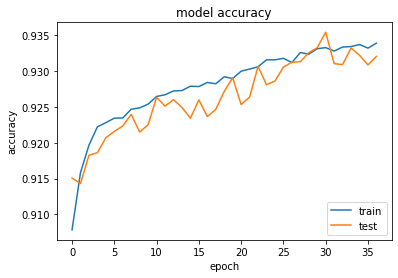

In [589]:
# plot training history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#show in the graph below the acurracy on both the trained and validated
#has a ever so slight increase, meaning the model could be trained longer
#to increase the accuracy of the model.It can also be seen that the model
#has not been over or under fitted as both show some comparable skill.

In [584]:
history.predict([0])

AttributeError: 'History' object has no attribute 'predict'